In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score


In [11]:
cd C:\Users\stayclassy\Desktop\python\Machine Learning\Linear Rigression\Data Set

C:\Users\stayclassy\Desktop\python\Machine Learning\Linear Rigression\Data Set


In [12]:
df= pd.read_csv("hiring.csv")

In [13]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [14]:
df.shape

(8, 4)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
test_score(out of 10),7.0,7.857143,1.345185,6.0,7.00,8.0,8.50,10.0
interview_score(out of 10),8.0,7.875000,1.642081,6.0,6.75,7.5,9.25,10.0
salary,8.0,63000.000000,11501.552690,45000.0,57500.00,63500.0,70500.00,80000.0


In [16]:
df.experience.fillna(0,inplace = True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [17]:
Experience = [] 

In [18]:
for i in range(8):
    if df.values[i][0] == 0:
        Experience.append(0)
    elif df.values[i][0] == 'two':
        Experience.append(2)
    elif df.values[i][0] == 'three':
        Experience.append(3)
    elif df.values[i][0] == 'five':
        Experience.append(5)
    elif df.values[i][0] == 'seven':
        Experience.append(7)
    elif df.values[i][0] == 'ten':
        Experience.append(10)
    elif df.values[i][0] == 'eleven':
        Experience.append(11)
    else:
        break

In [19]:
Experience

[0, 0, 5, 2, 7, 3, 10, 11]

In [20]:
df.drop(["experience"],axis=1,inplace=True)


In [21]:
df["Experience"]= Experience

In [22]:
df

,test_score(out of 10),interview_score(out of 10),salary,Experience
0,8.0,9,50000,0
1,8.0,6,45000,0
2,6.0,7,60000,5
3,10.0,10,65000,2
4,9.0,6,70000,7
5,7.0,10,62000,3
6,NaN,7,72000,10
7,7.0,8,80000,11


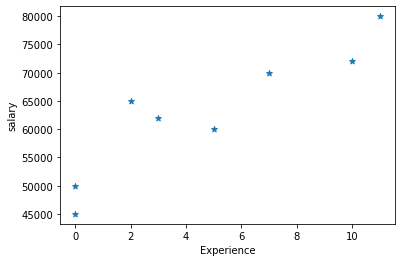

In [23]:
plt.xlabel("Experience")
plt.ylabel("salary")
plt.scatter(df["Experience"],df["salary"],marker="*")
plt.show()

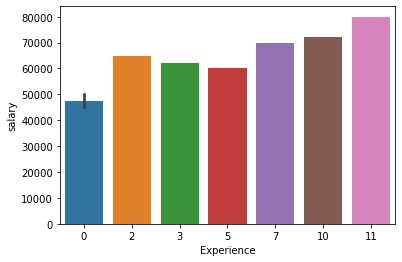

In [24]:
sns.barplot(df.Experience,df.salary)

In [25]:
import math
mean_test_score = math.floor(df['test_score(out of 10)'].mean())
mean_test_score

7

In [26]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(mean_test_score)

In [27]:
df

,test_score(out of 10),interview_score(out of 10),salary,Experience
0,8.0,9,50000,0
1,8.0,6,45000,0
2,6.0,7,60000,5
3,10.0,10,65000,2
4,9.0,6,70000,7
5,7.0,10,62000,3
6,7.0,7,72000,10
7,7.0,8,80000,11


In [28]:
df.columns =['test_score(out of 10)', 'interview_score(out of 10)', 'salary',
       'Experience']

In [29]:
x=df.drop('salary',axis='columns')
x

,test_score(out of 10),interview_score(out of 10),Experience
0,8.0,9,0
1,8.0,6,0
2,6.0,7,5
3,10.0,10,2
4,9.0,6,7
5,7.0,10,3
6,7.0,7,10
7,7.0,8,11


In [30]:
y=df.salary
y.head()


0    50000
1    45000
2    60000
3    65000
4    70000
Name: salary, dtype: int64

In [31]:
regression_model = LinearRegression()

In [32]:
regression_model.fit(x,y)

LinearRegression()

In [33]:
salary_predicted=regression_model.predict(x)
salary_predicted

array([52090.46734071, 45648.01964161, 57964.2290839 , 64525.1061363 ,
       68325.21184635, 60783.44785255, 74796.8832586 , 79866.63483999])

In [34]:
rmse=mean_squared_error(y,salary_predicted)
r2 = r2_score(y,salary_predicted) 

In [35]:
print('Slope:' ,regression_model.coef_) 
print('Intercept:', regression_model.intercept_) 
print('Root mean squared error: ', rmse) 
print('R2 score: ', r2) 

Slope: [2221.30909959 2147.48256637 2922.26901502]
Intercept: 14992.65144669314
Root mean squared error:  2660640.9097884092
R2 score:  0.9770139014273139
